# U.S. Medical Insurance Costs
In this project, a CSV file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

To start, all necessary libraries must be imported. 

In [268]:
# Importing csv and matplotlib libraries
import csv
from matplotlib import pyplot as plt


The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

In [269]:
# Reading csv file and its content
with open ("insurance.csv") as insurance_csv_file:
    print(insurance_csv_file.read())

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692
25,male,26.22,0,no,northeast,2721.3208
62,female,26.29,0,yes,southeast,27808.7251
23,male,34.4,0,no,southwest,1826.843
56,female,39.82,0,no,southeast,11090.7178
27,male,42.13,0,yes,southeast,39611.7577
19,male,24.6,1,no,southwest,1837.237
52,female,30.78,1,no,northeast,10797.3362
23,male,23.845,0,no,northeast,2395.17155
56,male,40.3,0,no,southwest,10602.385
30,male,35.3,0,yes,southwest,36837.467
60,female,36.005,0,no,northeast,13228.84695
30,female,32.4,1,no,southwest,4149.736
18,male,34.1,0,no,southeast,1137.011
34,female,31.92,1,yes,northeast,37701

**insurance.csv** contains the following columns:
* Client Age
* Client Sex 
* Client BMI
* Client Number of Children
* Client Smoking Status
* Client U.S Geopraphical Region
* Client Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.

In [270]:
# Breaking down each row into python lists
ages_list = []
sex_list = []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

with open("insurance.csv", newline='') as insurance_csv_file:
    data_reader = csv.DictReader(insurance_csv_file)
    for row in data_reader:
        ages_list.append(row['age'])
        sex_list.append(row['sex'])
        bmi_list.append(row['bmi'])
        children_list.append(row['children'])
        smoker_list.append(row['smoker'])
        region_list.append(row['region'])
        charges_list.append(row['charges'])
        
print(ages_list)

['19', '18', '28', '33', '32', '31', '46', '37', '37', '60', '25', '62', '23', '56', '27', '19', '52', '23', '56', '30', '60', '30', '18', '34', '37', '59', '63', '55', '23', '31', '22', '18', '19', '63', '28', '19', '62', '26', '35', '60', '24', '31', '41', '37', '38', '55', '18', '28', '60', '36', '18', '21', '48', '36', '40', '58', '58', '18', '53', '34', '43', '25', '64', '28', '20', '19', '61', '40', '40', '28', '27', '31', '53', '58', '44', '57', '29', '21', '22', '41', '31', '45', '22', '48', '37', '45', '57', '56', '46', '55', '21', '53', '59', '35', '64', '28', '54', '55', '56', '38', '41', '30', '18', '61', '34', '20', '19', '26', '29', '63', '54', '55', '37', '21', '52', '60', '58', '29', '49', '37', '44', '18', '20', '44', '47', '26', '19', '52', '32', '38', '59', '61', '53', '19', '20', '22', '19', '22', '54', '22', '34', '26', '34', '29', '30', '29', '46', '51', '53', '19', '35', '48', '32', '42', '40', '44', '48', '18', '30', '50', '42', '18', '54', '32', '37', '47', '20

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find geographical location of the clients
* find most overweight region
* creating a dictionary that contains all client information
* find smoker percentage for males and females
* find average bmi above certain age
* create charges chart based on clients age

To perform these inspections, a class called `Clients_Data` has been built out which contains six methods:
* `get_region()`
* `get_most_overweight_region()`
* `get_dictionary()`
* `get_smoker_pct()`
* `get_average_bmi_above_age()`
* `get_charges_chart`

The class has been built out below. 

In [271]:
class Clients_Data:
    # init method that takes in each list parameter
    def __init__(self, clients_age, clients_sex, clients_bmi, clients_num_children, 
                 clients_smoker_status, clients_region, clients_charge):
        self.clients_age = clients_age
        self.clients_sex = clients_sex
        self.clients_bmi = clients_bmi
        self.clients_num_children = clients_num_children
        self.clients_smoker_status = clients_smoker_status
        self.clients_region = clients_region
        self.clients_charge = clients_charge
        
    # method to find each region clients are from
    def get_region(self):
        region_types = []
        for type in self.clients_region:
            if type not in region_types:
                region_types.append(type)
        return region_types
    
    # method to find out average bmi for each region which will represent the most overweight region and less overweight region
    def get_most_overweight_region(self):
        bmi_southwest = []
        bmi_southeast = []
        bmi_northwest = []
        bmi_northeast = []
        bmi_region_zipped = list(zip(self.clients_bmi, self.clients_region))

        for bmi in bmi_region_zipped:
            if bmi[1] == 'southwest':
                bmi_southwest.append(float(bmi[0]))
            elif bmi[1] == 'southeast':
                bmi_southeast.append(float(bmi[0]))
            elif bmi[1] == 'northwest':
                bmi_northwest.append(float(bmi[0]))
            elif bmi[1] == 'northeast':
                bmi_northeast.append(float(bmi[0]))

        average_bmi_southwest = round((sum(bmi_southwest))/len(bmi_southwest),2)
        average_bmi_southeast = round((sum(bmi_southeast))/len(bmi_southeast),2)
        average_bmi_northwest = round((sum(bmi_northwest))/len(bmi_northwest),2)
        average_bmi_northeast = round((sum(bmi_northeast))/len(bmi_northeast),2)
        average_bmis = [average_bmi_southwest, average_bmi_southeast, average_bmi_northwest, average_bmi_northeast]
        region_names = ['southwest', 'southeast', 'northwest', 'northeast']
        average_bmis_sorted = sorted(list(zip(average_bmis, region_names)))
        print("Average BMI of Southwest is " + str(average_bmi_southwest))
        print("Average BMI of Southeast is " + str(average_bmi_southeast))
        print("Average BMI of Northwest is " + str(average_bmi_northwest))
        print("Average BMI of Northeast is " + str(average_bmi_northeast))
        print("The most overweight region is " + str(average_bmis_sorted[3]))
        print("Less overweight region is " + str(average_bmis_sorted[0]))
        
    
    # method to create dictionary with all clients information
    def get_dictionary(self):
        self.clients_dictionary = {}
        self.clients_dictionary["age"] = [int(age) for age in self.clients_age]
        self.clients_dictionary["sex"] = self.clients_sex
        self.clients_dictionary["bmi"] = self.clients_bmi
        self.clients_dictionary["children"] = self.clients_num_children
        self.clients_dictionary["smoker"] = self.clients_smoker_status
        self.clients_dictionary["regions"] = self.clients_region
        self.clients_dictionary["charges"] = [float(charge) for charge in self.clients_charge]
        return self.clients_dictionary   

    # method to find smoker percentage for male and female
    def get_smoker_pct(self):
        
        # find males and females count in the list
        males = 0
        females = 0
        for sex in self.clients_sex:
            if sex == 'male':
                males += 1
            elif sex == 'female':
                females += 1
        
        # find smoker percentage for male and female     
        sex_smoker_zipped = list(zip(self.clients_sex, self.clients_smoker_status))
        male_smoker = []
        female_smoker = []
        for sex_sm in sex_smoker_zipped:
            if sex_sm[0] == 'male'and sex_sm[1] == 'yes':
                male_smoker.append(1)
            elif sex_sm[0] == 'female' and sex_sm[1] == 'yes':
                female_smoker.append(1)
        male_smoker_pct = round((len(male_smoker)/males)*100, 2)
        female_smoker_pct = round((len(female_smoker)/females)*100, 2)
        print(str(male_smoker_pct) + " percent of male clients smoke")
        print(str(female_smoker_pct) + " percent of female clients smoke")
        

    # method to get average bmi for group of age above input(for example: bmi above 60 years old)   
    def get_average_bmi_above_age(self, age):
        
        age_bmi_zipped = list(zip(self.clients_age, self.clients_bmi))
        bmis = []
        
        for value in age_bmi_zipped:
            if age < float(value[0]):
                bmis.append(float(value[1]))
                average_bmi_for_age = round(sum(bmis)/len(bmis), 2)
            elif age >= float(max(self.clients_age)):
                print("Given age is out of range,Try reducing age")
                break
                
        print("Average bmi for " + str (age) +" years old is " + str(average_bmi_for_age))
            
       
    # method to get chart of charges in regards to age
    def get_charges_chart(self):
        float_charges_list = [float(charge) for charge in self.clients_charge]
        int_age_list = [int(age) for age in self.clients_age]
        
        # Graph the charges to age as a scatterplot: 
        x = int_age_list
        y = float_charges_list
        plt.scatter(x, y, alpha=0.5)
        ax = plt.subplot()
        plt.title("Clients yearly charges relation to their age")
        ax.set_xlabel("AGE")
        ax.set_ylabel("CHARGES")
        plt.show()

The next step is to create an instance of the class called `clients_data`. With this instance, each method can be used to see the results of the analysis.

In [272]:
clients_data = Clients_Data(ages_list, sex_list, bmi_list, children_list, smoker_list, region_list, charges_list)

In [273]:
clients_data.get_region()

['southwest', 'southeast', 'northwest', 'northeast']

There are four geographical regions in this dataset, and it is important to note that all the patients come from the United States.

In [274]:
clients_data.get_most_overweight_region()

Average BMI of Southwest is 30.6
Average BMI of Southeast is 33.36
Average BMI of Northwest is 29.2
Average BMI of Northeast is 29.17
The most overweight region is (33.36, 'southeast')
Less overweight region is (29.17, 'northeast')


Based on data we found out that clients from Southeast have highest bmi index which indicates high concetration of obesed people in that region. And Northeast have lowest average bmi which indicates that clients in that region struggle less with overweight comparing to the rest of the country.

In [275]:
clients_data.get_dictionary()

{'age': [19,
  18,
  28,
  33,
  32,
  31,
  46,
  37,
  37,
  60,
  25,
  62,
  23,
  56,
  27,
  19,
  52,
  23,
  56,
  30,
  60,
  30,
  18,
  34,
  37,
  59,
  63,
  55,
  23,
  31,
  22,
  18,
  19,
  63,
  28,
  19,
  62,
  26,
  35,
  60,
  24,
  31,
  41,
  37,
  38,
  55,
  18,
  28,
  60,
  36,
  18,
  21,
  48,
  36,
  40,
  58,
  58,
  18,
  53,
  34,
  43,
  25,
  64,
  28,
  20,
  19,
  61,
  40,
  40,
  28,
  27,
  31,
  53,
  58,
  44,
  57,
  29,
  21,
  22,
  41,
  31,
  45,
  22,
  48,
  37,
  45,
  57,
  56,
  46,
  55,
  21,
  53,
  59,
  35,
  64,
  28,
  54,
  55,
  56,
  38,
  41,
  30,
  18,
  61,
  34,
  20,
  19,
  26,
  29,
  63,
  54,
  55,
  37,
  21,
  52,
  60,
  58,
  29,
  49,
  37,
  44,
  18,
  20,
  44,
  47,
  26,
  19,
  52,
  32,
  38,
  59,
  61,
  53,
  19,
  20,
  22,
  19,
  22,
  54,
  22,
  34,
  26,
  34,
  29,
  30,
  29,
  46,
  51,
  53,
  19,
  35,
  48,
  32,
  42,
  40,
  44,
  48,
  18,
  30,
  50,
  42,
  18,
  54,
  32,
  37,
  4

All client data is now neatly organized in a dictionary. This is convenient for further analysis if a decision is made to continue making investigations for the attributes in **insurance.csv**.

In [276]:
clients_data.get_smoker_pct()

23.52 percent of male clients smoke
17.37 percent of female clients smoke


Based on provided data in **insurance.csv** we found that 23.52% of males and 17.37% of females are smokers.

In [277]:
clients_data.get_average_bmi_above_age(60)

Average bmi for 60 years old is 32.44


We can analyze age threshold and see how average bmi increases with age. The higher age the higher average bmi accross client pool.

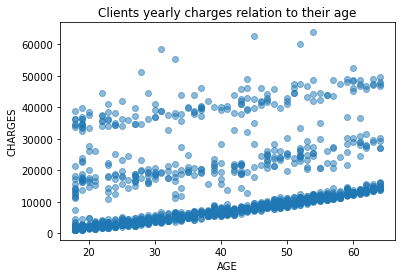

In [278]:
clients_data.get_charges_chart()

This method allows us to visualize data and see that insurance charge increases with age. 